In [31]:
from cProfile import label
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Flatten
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor
from datetime import *
from os import *
from dataprep import *
#path='C:\Users\bensa\OneDrive - Microsoft\Documents\MRPLocal\Data'
path= 'C:\\Users\\bensa\\OneDrive - Microsoft\\Documents\\MRPLocal\\Data'

Next -- build out table of metrics and the runner
Write the metrics to a CSV for storage
Use an init for the first metric build

Run a few test runs to see what else we need to record.



Experiment Plans

Build out models to compare performance on
Look at hyperparameter tuning
ONce models are adequately baked, then move to A and B below

A Experiment on using different patients inputs and keeping track of metrics
B Experiment on using feature engineering and build out metrics further


Implement Data cleaning from development to the data helper functions
Add in ability to look at a per patient basis
Perhaps start with overall data size, and then with a % set to train v test


In [25]:
## Record the results
Execution_time = []
train_rmse_results = []
test_rmse_results=[]
run_id = []
sample_size=[]
epochs = []
batch_size=[]
optimizer=[]
layers=[]
forecast_distance_perf=[]
prev_readings=[]



In [71]:
for i in range (10):
    ## Simple RNN Model
    ## Initialize
    model_name = 'SimpleRNN'
    num_layers = 3
    epochs_num = 30
    batch_size_set = 200
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)



    #SETUP THE STACK
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(150, activation='tanh', input_shape=(number_readings,1)))
    model_rnn.add(Dropout(0.1))
    model_rnn.add(Dense(10))
    model_rnn.add(Dense(1))
    #START THE RUN
    print('\nRunning RNN model...')
    start = datetime.now()

    model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.3, batch_size=batch_size_set)
    train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)

## determine why this is pushing out lists instead of an array


Running RNN model...
Epoch 1/30
154/154 [==============================] - 18s 111ms/step - loss: 5.5255 - root_mean_squared_error: 2.3506 - val_loss: 3.1540 - val_root_mean_squared_error: 1.7759
Epoch 2/30
154/154 [==============================] - 14s 92ms/step - loss: 3.9398 - root_mean_squared_error: 1.9849 - val_loss: 3.8332 - val_root_mean_squared_error: 1.9579
Epoch 3/30
154/154 [==============================] - 14s 94ms/step - loss: 3.7998 - root_mean_squared_error: 1.9493 - val_loss: 2.9313 - val_root_mean_squared_error: 1.7121
Epoch 4/30
154/154 [==============================] - 14s 89ms/step - loss: 3.8478 - root_mean_squared_error: 1.9616 - val_loss: 3.7753 - val_root_mean_squared_error: 1.9430
Epoch 5/30
154/154 [==============================] - 15s 101ms/step - loss: 3.8021 - root_mean_squared_error: 1.9499 - val_loss: 2.9574 - val_root_mean_squared_error: 1.7197
Epoch 6/30
154/154 [==============================] - 15s 96ms/step - loss: 3.7463 - root_mean_squared_err

In [7]:
## LSTM Model
## Initialize
model_name = 'LSTM - Personal'
num_layers = 4
epochs_num = 20
batch_size_set = 100
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



#SETUP THE STACK
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', input_shape=(number_readings, 1),return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1))

#START THE RUN
print('\nRunning LSTM model...')
start = datetime.now()

model_lstm.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_lstm.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_lstm.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_lstm.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)




Running LSTM model...
Epoch 1/20
11/11 [==============================] - 4s 96ms/step - loss: 42.9958 - root_mean_squared_error: 6.5571 - val_loss: 29.9209 - val_root_mean_squared_error: 5.4700
Epoch 2/20
11/11 [==============================] - 0s 45ms/step - loss: 14.4209 - root_mean_squared_error: 3.7975 - val_loss: 12.4249 - val_root_mean_squared_error: 3.5249
Epoch 3/20
11/11 [==============================] - 1s 53ms/step - loss: 9.3560 - root_mean_squared_error: 3.0588 - val_loss: 16.2381 - val_root_mean_squared_error: 4.0297
Epoch 4/20
11/11 [==============================] - 0s 43ms/step - loss: 8.2417 - root_mean_squared_error: 2.8708 - val_loss: 9.3973 - val_root_mean_squared_error: 3.0655
Epoch 5/20
11/11 [==============================] - 0s 42ms/step - loss: 7.3981 - root_mean_squared_error: 2.7200 - val_loss: 9.3159 - val_root_mean_squared_error: 3.0522
Epoch 6/20
11/11 [==============================] - 0s 42ms/step - loss: 6.7376 - root_mean_squared_error: 2.5957 - v

In [12]:
## GRU Model
## Initialize
model_name = 'GRU - Personal'
num_layers = 4
epochs_num = 6
batch_size_set = 100
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK
model_gru = Sequential()
model_gru.add(GRU(60, activation='relu', input_shape=(number_readings,1), return_sequences=True))
model_gru.add(GRU(20, activation='relu'))
model_gru.add(Dense(10))
model_gru.add(Dense(1))


#START THE RUN
print('\nRunning GRU model...')
start = datetime.now()

model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)



Running GRU model...
Epoch 1/6
39/39 [==============================] - 4s 36ms/step - loss: 86.1960 - root_mean_squared_error: 9.2842 - val_loss: 10.3675 - val_root_mean_squared_error: 3.2199
Epoch 2/6
39/39 [==============================] - 1s 16ms/step - loss: 5.6330 - root_mean_squared_error: 2.3734 - val_loss: 5.5414 - val_root_mean_squared_error: 2.3540
Epoch 3/6
39/39 [==============================] - 1s 15ms/step - loss: 4.2514 - root_mean_squared_error: 2.0619 - val_loss: 5.0508 - val_root_mean_squared_error: 2.2474
Epoch 4/6
39/39 [==============================] - 1s 16ms/step - loss: 3.8411 - root_mean_squared_error: 1.9599 - val_loss: 4.4892 - val_root_mean_squared_error: 2.1188
Epoch 5/6
39/39 [==============================] - 1s 16ms/step - loss: 3.3979 - root_mean_squared_error: 1.8433 - val_loss: 4.0740 - val_root_mean_squared_error: 2.0184
Epoch 6/6
150/150 [==============================] - 1s 4ms/step - loss: 2.9581 - root_mean_squared_error: 1.7199

training ti

In [30]:

## CNN RNN
## Initialize
model_name = 'CNN - RNN'
num_layers = 4
epochs_num = 15
batch_size_set = 50
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=3, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK

model_cnn_rnn = Sequential()
model_cnn_rnn.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(number_readings,1)))
model_cnn_rnn.add(tf.keras.layers.MaxPooling1D((1)))
model_cnn_rnn.add(SimpleRNN(120, activation='relu', return_sequences=True))
#model_cnn_rnn.add(LSTM(10, activation='relu', return_sequences=True))
model_cnn_rnn.add(Flatten())
model_cnn_rnn.add(Dense(1))


#START THE RUN
print('\nRunning CNN RNN model...')
start = datetime.now()

model_cnn_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_cnn_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'CNN RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_cnn_rnn.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)



Running CNN RNN model...
Epoch 1/15
403/403 [==============================] - 5s 9ms/step - loss: 7.2989 - root_mean_squared_error: 2.7016 - val_loss: 5.0363 - val_root_mean_squared_error: 2.2442
Epoch 2/15
403/403 [==============================] - 3s 8ms/step - loss: 4.4570 - root_mean_squared_error: 2.1112 - val_loss: 4.7884 - val_root_mean_squared_error: 2.1882
Epoch 3/15
403/403 [==============================] - 4s 9ms/step - loss: 4.2042 - root_mean_squared_error: 2.0504 - val_loss: 4.4610 - val_root_mean_squared_error: 2.1121
Epoch 4/15
403/403 [==============================] - 3s 8ms/step - loss: 4.0461 - root_mean_squared_error: 2.0115 - val_loss: 4.8105 - val_root_mean_squared_error: 2.1933
Epoch 5/15
403/403 [==============================] - 3s 8ms/step - loss: 3.9426 - root_mean_squared_error: 1.9856 - val_loss: 4.4112 - val_root_mean_squared_error: 2.1003
Epoch 6/15
403/403 [==============================] - 4s 9ms/step - loss: 3.9215 - root_mean_squared_error: 1.9803

In [9]:
for i in range (5):
    ## GRU w Features Model
    ## Initialize
    model_name = 'GRU - w Features personalised'
    num_layers = 4
    epochs_num = 10
    batch_size_set = 100
    optimizer_set = 'adam'
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequencesMulti(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)


    #SETUP THE STACK
    model_gru = Sequential()
    model_gru.add(GRU(70, activation='relu', input_shape=(number_readings,2), return_sequences=True))
    model_gru.add(GRU(20, activation='relu'))
    model_gru.add(Dense(10))
    model_gru.add(Dense(1))


    #START THE RUN
    print('\nRunning GRU model...')
    start = datetime.now()

    model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
    train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)


Running GRU model...
Epoch 1/10
16/16 [==============================] - 4s 48ms/step - loss: 161.7147 - root_mean_squared_error: 12.7167 - val_loss: 52.0066 - val_root_mean_squared_error: 7.2116
Epoch 2/10
16/16 [==============================] - 0s 22ms/step - loss: 33.9259 - root_mean_squared_error: 5.8246 - val_loss: 12.6275 - val_root_mean_squared_error: 3.5535
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 6.8331 - root_mean_squared_error: 2.6140 - val_loss: 6.2372 - val_root_mean_squared_error: 2.4974
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 3.9389 - root_mean_squared_error: 1.9847 - val_loss: 5.7127 - val_root_mean_squared_error: 2.3901
Epoch 5/10
16/16 [==============================] - 0s 25ms/step - loss: 3.5591 - root_mean_squared_error: 1.8866 - val_loss: 5.4202 - val_root_mean_squared_error: 2.3281
Epoch 6/10
16/16 [==============================] - 0s 26ms/step - loss: 3.4298 - root_mean_squared_error: 1.8520 - v

In [20]:
for i in range(10):
    ## Simple RNN Model w Features
    ## Initialize
    model_name = 'SimpleRNN w Features Personalised'
    num_layers = 5
    epochs_num = 12
    batch_size_set = 200
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF
    X_train,X_test,y_train,y_test = a.SampleValidSequencesMulti(num_clients=1, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
    #a.SampleValidSequences(num_clients=5, test_split=0.3)
    #a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)



    #SETUP THE STACK
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(150, activation='relu', input_shape=(number_readings,2)))
    model_rnn.add(Dense(60))
    model_rnn.add(Dense(20))
    model_rnn.add(Dense(10))
    model_rnn.add(Dense(1))
    #START THE RUN
    print('\nRunning RNN model...')
    start = datetime.now()

    model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
    train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
    train_time = (datetime.now()-start).total_seconds()
    print("\ntraining time %s" % train_time)

    #PRINT RESULTS
    print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
    #Test set results
    test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
    print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

    #y_pred = model_rnn.predict(X_test)

    Execution_time.append(train_time)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    run_id.append(model_name+str(datetime.now()))
    sample_size.append(len(X_train))
    epochs.append(epochs_num)
    batch_size.append(batch_size_set)
    optimizer.append(optimizer_set)
    layers.append(num_layers)
    forecast_distance_perf.append(forecast_distance)
    prev_readings.append(number_readings)


Running RNN model...
Epoch 1/12
51/51 [==============================] - 2s 29ms/step - loss: 11.9767 - root_mean_squared_error: 3.4607 - val_loss: 2.6192 - val_root_mean_squared_error: 1.6184
Epoch 2/12
51/51 [==============================] - 1s 26ms/step - loss: 2.6195 - root_mean_squared_error: 1.6185 - val_loss: 2.3643 - val_root_mean_squared_error: 1.5376
Epoch 3/12
51/51 [==============================] - 1s 27ms/step - loss: 2.5583 - root_mean_squared_error: 1.5995 - val_loss: 2.2625 - val_root_mean_squared_error: 1.5041
Epoch 4/12
51/51 [==============================] - 1s 25ms/step - loss: 2.4852 - root_mean_squared_error: 1.5765 - val_loss: 2.1706 - val_root_mean_squared_error: 1.4733
Epoch 5/12
51/51 [==============================] - 1s 24ms/step - loss: 2.4896 - root_mean_squared_error: 1.5778 - val_loss: 2.1177 - val_root_mean_squared_error: 1.4552
Epoch 6/12
51/51 [==============================] - 1s 22ms/step - loss: 2.6020 - root_mean_squared_error: 1.6131 - val_lo

In [22]:
metrics_df = pd.DataFrame(list(zip(Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,
prev_readings))
    ,columns=['Execution_time','train_rmse_results','test_rmse_results','run_id','sample_size','epochs','batch_size','optimizer','layers','forecast_distance_perf',
'prev_readings'])

In [23]:
metrics_df

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,37.459268,1.775936,1.869360,GRU - w Features2022-08-12 07:55:31.274619,16059,10,50,adam,4,6,8
1,41.449500,1.874869,1.934751,SimpleRNN w Features2022-08-12 07:57:07.442585,28530,15,120,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,6,8
2,32.160103,2.073965,2.158123,GRU - w Features2022-08-12 07:58:29.655361,19476,10,100,adam,4,6,8
3,24.594147,1.820412,1.861851,GRU - w Features2022-08-12 07:59:03.117479,13910,10,100,adam,4,6,8
4,37.955700,1.738953,1.881305,GRU - w Features2022-08-12 07:59:51.171444,20601,10,100,adam,4,6,8
...,...,...,...,...,...,...,...,...,...,...,...
60,16.542284,1.975558,2.148362,SimpleRNN - Personal2022-08-12 16:00:47.745372,13587,12,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,5,6,8
61,13.030077,2.231526,2.028022,SimpleRNN - Personal2022-08-12 16:01:08.444732,11107,12,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,5,6,8
62,3.798726,1.507133,1.290481,SimpleRNN - Personal2022-08-12 16:01:20.355310,1864,12,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,5,6,8
63,14.289721,1.389069,1.451305,SimpleRNN - Personal2022-08-12 16:03:43.372867,9032,12,200,<keras.optimizer_v2.adam.Adam object at 0x0000...,5,6,8


In [69]:
def buildModel(neurons=150, activation='relu',dropout_rate=0.1):
    ## Simple RNN Model
    ## Initialize
    model_name = 'SimpleRNN - Personal'
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01) #momentum - 0.9?
    forecast_distance=6
    number_readings=8

    ## Get New Data
    a=DataSampling(path=path)
    a.samplingDF


    #SETUP THE STACK
    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(neurons, activation=activation, input_shape=(number_readings,1)))
    model_rnn.add(Dropout(dropout_rate))
    model_rnn.add(Dense(10))
    model_rnn.add(Dense(1))

    
    model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model_rnn

a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=2, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


kModel=KerasRegressor(model=buildModel, verbose=0) ##epochs 30 for final

#epochs=10,batch_size=200,

epochs=[15,30,45] #30
batch_size=[100,150,200] #200
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] #0.01
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] ##NA
activation_set=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] #tanh,relu.softsign
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #0.1 or 0.2
neurons = [50, 100, 150, 200, 250] #150 or 200
## Activation function / Number Neurons / Optimizer

param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(model__activation=activation_set)
#param_grid = dict(model__dropout_rate=dropout_rate)
#param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=kModel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)


In [72]:
def buildModel(neurons=150, activation='relu',dropout_rate=0.1):
    ## Simple RNN Model
    ## Initialize
    model_name = 'GRU'
    optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01) #momentum - 0.9?
    forecast_distance=6
    number_readings=8




    #SETUP THE STACK
    model_gru = Sequential()
    model_gru.add(GRU(neurons, activation=activation, input_shape=(number_readings,1), return_sequences=True))
    model_gru.add(GRU(20, activation=activation))
    model_gru.add(Dense(10))
    model_gru.add(Dense(1))

    
    model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model_gru

a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=2, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


kModel=KerasRegressor(model=buildModel, verbose=0) ##epochs 30 for final

#epochs=10,batch_size=200,

epochs=[15,30,45] #30
batch_size=[100,150,200] #200
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] #0.01
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] ##NA
activation_set=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] #tanh,relu.softsign
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #0.1 or 0.2
neurons = [50, 100, 150, 200, 250] #150 or 200
## Activation function / Number Neurons / Optimizer

param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(epochs=epochs,batch_size=batch_size)
#param_grid = dict(model__activation=activation_set)
#param_grid = dict(model__dropout_rate=dropout_rate)
#param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=kModel, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)


In [70]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2.695702 using {'batch_size': 200, 'epochs': 30}
-2.884388 (0.514634) with: {'batch_size': 100, 'epochs': 15}
-2.744219 (0.496258) with: {'batch_size': 100, 'epochs': 30}
-2.781870 (0.523337) with: {'batch_size': 100, 'epochs': 45}
-2.785050 (0.482216) with: {'batch_size': 150, 'epochs': 15}
-2.966836 (0.080778) with: {'batch_size': 150, 'epochs': 30}
-2.767534 (0.487310) with: {'batch_size': 150, 'epochs': 45}
-2.735126 (0.383618) with: {'batch_size': 200, 'epochs': 15}
-2.695702 (0.470909) with: {'batch_size': 200, 'epochs': 30}
-2.726045 (0.421071) with: {'batch_size': 200, 'epochs': 45}


In [24]:
filename='metrics_full.csv'
metrics_file = os.path.join(path, filename)
## Load all previously generate metrics
all_history = pd.read_csv(metrics_file)
all_history.drop('Unnamed: 0',axis=1,inplace=True)

## Concatenate all metrics
full_metrics=pd.concat([all_history,metrics_df])
full_metrics.to_csv(metrics_file)
## Write complete DF back to original File
#drop recorded results




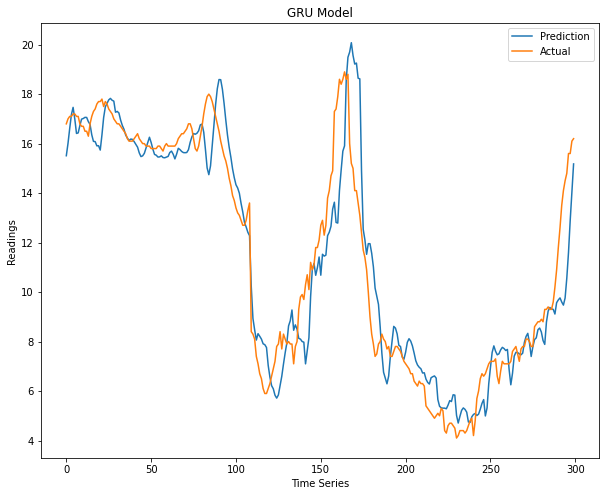

In [15]:

y_pred = model_gru.predict(X_test)
plt.figure(figsize=(10,8))
plt.plot(range(len(y_pred[:300])),y_pred[:300], label='Prediction')
plt.plot(y_test[:300], label='Actual')
plt.xlabel('Time Series')
plt.ylabel('Readings')
plt.title('GRU Model')
plt.legend()
plt.show()